In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
from src.ocr_insurance_card.pipeline.load_data import *
from src.ocr_base.display.display import Display
from src.ocr_base.image_processing.bounding_poly import BoundingPoly as BP
import cv2
from PIL import Image, ImageDraw

In [13]:
img_path = image_dir + "/01.jpg"
img_path

'/Users/thuyttt/Documents/AI-Lab/05_Programming/ocr-research/data/raw/insurance_cards/image/01.jpg'

In [14]:
img = cv2.imread(img_path, 1)
type(img)

numpy.ndarray

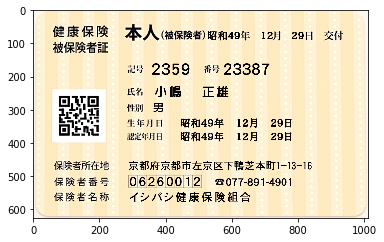

In [15]:
Display.display_img_nb(img)

In [16]:
img1 = Image.open(img_path)
type(img1)

PIL.JpegImagePlugin.JpegImageFile

In [17]:
bps = gcv_res_dict["01"]["bouding_poly"][1:]
bps

['[(61,40),(382,44),(381,92),(60,88)]',
 '[(387,45),(400,45),(399,92),(386,92)]',
 '[(401,45),(503,46),(502,93),(400,92)]',
 '[(511,46),(524,46),(523,93),(510,93)]',
 '[(529,46),(645,48),(644,96),(528,94)]',
 '[(695,49),(837,51),(836,98),(694,96)]',
 '[(881,51),(933,52),(932,100),(880,99)]',
 '[(65,92),(223,92),(223,132),(65,132)]',
 '[(295,150),(326,150),(326,208),(295,208)]',
 '[(360,150),(476,150),(476,208),(360,208)]',
 '[(517,150),(559,150),(559,208),(517,208)]',
 '[(582,150),(709,150),(709,208),(582,208)]',
 '[(290,221),(324,221),(324,269),(290,269)]',
 '[(368,221),(447,221),(447,269),(368,269)]',
 '[(510,221),(589,221),(589,269),(510,269)]',
 '[(290,276),(327,276),(327,310),(290,310)]',
 '[(370,276),(379,276),(379,310),(370,310)]',
 '[(281,321),(390,320),(390,356),(281,357)]',
 '[(450,320),(563,319),(563,355),(450,356)]',
 '[(617,319),(778,318),(778,353),(617,354)]',
 '[(293,365),(384,364),(384,396),(293,397)]',
 '[(451,364),(775,361),(775,393),(451,396)]',
 '[(157,353),(200,353

In [18]:
bps = BP.convert_to_array(bps)
bps[0]

array([[ 61.,  40.],
       [382.,  44.],
       [381.,  92.],
       [ 60.,  88.]], dtype=float32)

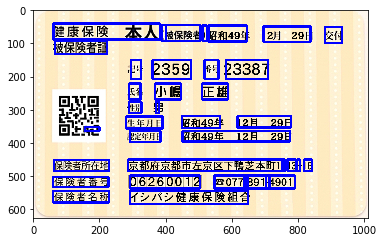

In [19]:
Display.draw_boxes(img, bps)

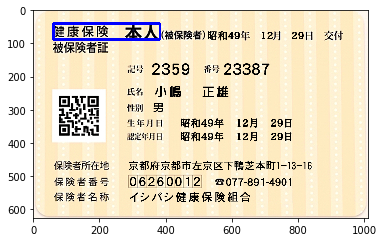

In [21]:
Display.draw_boxes(img, bps[0])

In [22]:
Display.draw_boxes(img, bps[1])

In [28]:
block_words = gcv_res_dict["01"]["final_text"]
element_words = gcv_res_dict["01"]["full_text"][1:]
element_words_bp = gcv_res_dict["01"]["bouding_poly"][1:]

In [29]:
two_texts = element_words[:2]
two_bp = element_words_bp[:2]
two_texts

['健康保険本人', '(']

In [30]:
two_bp = BP.convert_to_array(two_bp)
two_bp

[array([[ 61.,  40.],
        [382.,  44.],
        [381.,  92.],
        [ 60.,  88.]], dtype=float32), array([[387.,  45.],
        [400.,  45.],
        [399.,  92.],
        [386.,  92.]], dtype=float32)]

In [41]:
joint_text, joint_bp = BP.match_inline_texts(two_texts, two_bp)
joint_text, joint_bp

('健康保険本人 (', array([[ 61.,  40.],
        [400.,  44.],
        [399.,  92.],
        [ 60.,  92.]], dtype=float32))

In [42]:
Display.draw_boxes(img, joint_bp)

(61.0, 40.0, 339.0, 52.0)


In [43]:
gcv_res_dict["01"]["bouding_poly"][0]

'[(59,40),(933,40),(933,585),(59,585)]'